# Git

 > Aviso: Este post foi traduzido para o português usando um modelo de tradução automática. Por favor, me avise se encontrar algum erro.

## Introdução

Git é um software de controle de versões criado por Linus Torvalds, que o desenvolveu para ter um bom controle de versões ao desenvolver o kernel do Linux.

## As áreas do git

Git tem três áreas, embora também se possa considerar uma quarta.
![git states](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/git-states.webp)
* A primeira é nosso espaço de trabalho, onde temos todo o nosso código. Aqui, quando modificamos ou criamos um arquivo, ele passa a estar como não rastreado, então precisamos movê-lo para a área de `staged`* A segunda área é a de `staged`. Aqui os arquivos que havíamos modificado ou criado e que estavam não *trackeados* passam a estar trackeados, ou seja, git faz um acompanhamento. Aqui enviaremos os arquivos para a próxima área de `head`* A terceira área é a de `head`. Nela registramos uma versão do nosso código. Dessa forma, registrando versões podemos voltar a versões anteriores se necessário. A versão registrada do nosso código pode ser enviada para um servidor de modo que seja acessível por várias pessoas.* As três áreas anteriores correspondem ao trabalho local, mas há uma área adicional e é a de `remote server`. Aqui, o que fazemos é enviar a versão gravada do nosso código para um servidor, de modo que tenhamos acesso ao código de qualquer lugar ou que mais pessoas tenham acesso.
Para fazer um símil, é como um cenário em que você vai tirar uma foto. Primeiro, você tem seus arquivos modificados, então os que quer imortalizar você envia para a área de `staged`, ou seja, o palco. No momento em que enviou todos os arquivos que considera, tira a foto, portanto, envia todos os arquivos para a área de `head`. Dessa forma, você pode ir tirando muitas fotos conforme o código evolui, de maneira que pode ter um álbum de fotos com a evolução do código. Por fim, você pode enviar essa foto para um servidor para que seja acessível por mais pessoas, ou seja, os envia para a área de `remote server`.

## Instalar git

Em maioria das distribuições Linux, o Git já vem instalado. Podemos verificar isso usando `git --version`.

In [1]:
!git --version

git version 2.25.1


Se você não tiver ou quiser atualizar a versão do git, basta executar `sudo apt update` e em seguida `sudo apt install git`

In [3]:
!sudo apt update && sudo apt install git

[sudo] password for maximo.fernandez@AEROESPACIAL.SENER: 


Voltamos a verificar a versão

In [4]:
!git --version

git version 2.25.1


No meu caso, eu já tinha a última versão.

## Configuração inicial

### Configuração do nome e do email

Antes de começar a usar o git é recomendável que faça algumas configurações mínimas, como o nome de usuário e o email. Esta informação será exibida quando for mostrado quem fez alterações no código. Para fazer isso, é necessário executar

```bash
git config --global user.name "<nome de usuário>"git config --global user.email "<email>"```

No meu caso, eu colocaria
```bash
git config --global user.name "MaximoFN"git config --global user.email "maximofn@gmail.com"```

Como se pode ver, a flag `--global` serve para alterar a configuração global do git. No entanto, se em um repositório específico você precisa fornecer outros dados, basta navegar até o repositório e remover a flag `--global` dos comandos anteriores.
```bash
git config user.name "<nome do usuário>"git config user.email "<email>"```

### Configurar o editor padrão

Quando explicarmos o que são os `commit`s veremos que em uma das opções pode nos abrir um navegador. Por padrão, o git tentará usar `vim`, mas dado que não é um editor muito simples de usar, podemos modificá-lo. A seguir, mostramos como fazer isso com alguns editores comuns.
```bash
git config --global core.editor "code"  # vscode como editorgit config --global core.editor "atom"  # Atom como editorgit config --global core.editor "subl"  # Sublime Text como editorgit config --global core.editor "nano"  # Nano como editor```

### Verificar configuração do git

Para verificar a configuração do git, podemos usar `git config --list`

In [6]:
!git config --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true
core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


Podemos usar os flags `--global`, `--local` e `--system` para ver apenas a configuração global, local (se existir) e do sistema (se existir).

In [8]:
!git config --global --list

user.name=maximofn
user.email=maximofn@gmail.com
user.user=maximofn
http.sslverify=true


In [9]:
!git config --local --list

core.repositoryformatversion=0
core.filemode=true
core.bare=false
core.logallrefupdates=true
remote.origin.url=https://github.com/maximofn/portafolio.git
remote.origin.fetch=+refs/heads/*:refs/remotes/origin/*
branch.main.remote=origin
branch.main.merge=refs/heads/main


In [10]:
!git config --system --list

fatal: unable to read config file '/etc/gitconfig': No such file or directory


No existe configuração de sistema no meu caso

Se quiser saber apenas o valor de um parâmetro da configuração, basta inserir `git config <parameter>`

In [15]:
!git config user.name

maximofn


## Controle de versões localmente

### Inicializar um novo repositório (`git init`)

Há duas maneiras de inicializar um novo repositório fazendo* Uma é fazendo `git init <nome do repositório>`. Isso criará uma nova pasta com o nome do repositório.* Outra é navegar até a pasta onde queremos criar um repositório e fazer `git init`
Vou criar um novo repositório

In [1]:
!git init notebook_git

Inicializado repositorio Git vacío en /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/


Se agora fizermos `ls` veremos que foi criada uma nova pasta chamada `notebook_git`

In [3]:
!ls | grep notebook_git

notebook_git


Nós nos movemos para ela

In [4]:
!cd notebook_git

Agora dentro da pasta temos duas maneiras de saber que o repositório foi criado, uma fazendo `ls -a` que mostrará todos os arquivos e veremos que há uma pasta chamada `.git`. A outra maneira é fazendo `git status` que nos dirá o estado do repositório.

In [5]:
!cd notebook_git && ls -a

.  ..  .git


In [6]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

no hay nada para confirmar (crea/copia archivos y usa "git add" para hacerles seguimiento)


Como estamos em um notebook, cada célula tem seu `path` no `path` do notebook, por isso as duas vezes tive que fazer `cd notebook_git &&`, para mudar para a pasta com o repositório que acabamos de criar.

Se agora eu testar `git status` em outro `path` onde não tenha sido inicializado um repositório, isso resultará em um erro.

In [95]:
!cd ~/ && git status

fatal: no es un repositorio git (ni ninguno de los directorios superiores): .git


### Criar novos arquivos

No momento em que inicializamos um repositório, podemos começar a criar novos arquivos, então criamos um e vemos o que acontece.

In [7]:
!cd notebook_git && echo "print('Hello World')" > hello.py

Se agora executarmos `git status`, veremos que aparece

In [8]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hello.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como se pode ver agora nos está dizendo que o arquivo `hello.py` não tem acompanhamento. Ou seja, temos que adicionar `hello.py` à área de `staged`, que lembramos ser como o palco onde vamos colocar tudo o que mais tarde faremos um instantâneo.

### Desfazer a criação de um novo arquivo

Neste caso, como são arquivos que o Git ainda não está acompanhando, ou seja, que ainda não estão na área de `staged`, teríamos três maneiras de fazer isso.

* Apagando-o simplesmente: Como o git ainda não está seguindo o arquivo, podemos fazer `rm hello.py` e pronto.* Excluindo-o com um comando do Git: Antes excluímos com `rm`, mas pode ser que você esteja em um sistema que não tenha o comando `rm`. Portanto, nesse caso, pode-se usar o comando do Git `git rm hello.py`* Por último, podemos usar `git clean`. Este é útil, por exemplo, quando há muitos arquivos novos, e assim, em um único comando, removemos todos.

#### `git clean`

Se executarmos `git clean` sem nenhum argumento, receberemos um erro.

In [9]:
!cd notebook_git && git clean

fatal: clean.requireForce default en true y ninguno de -i, -n, ni -f entregado; rehusando el clean


Ele nos diz que é necessário adicionar um desses flags `-n`, `-i` ou `-f`. Além disso, vamos ver o flag `-d`.
* `-n` (execução simulada): Ditará quais arquivos serão excluídos, mas não os excluirá* `-i`: Perguntará por cada arquivo que vai ser apagado* `-f`: Forçará a exclusão dos arquivos* `-d`: Também excluirá pastas

Vamos testar, primeiro fazemos `git clean -n` para saber quais arquivos seriam deletados

In [10]:
!cd notebook_git && git clean -n

Será borrado hello.py


Agora fazemos `git clean -f` para que ele apague, já que concordamos em apagá-lo.

In [11]:
!cd notebook_git && git clean -f

Borrando hello.py


Como vemos, ele apagou `hello.py`

### Adicionar um arquivo à área de staged (`git add`)

Voltamos a criar um arquivo

In [12]:
!cd notebook_git && echo "print('Hola mundo')" > hola.py

Voltamos a fazer um `git status` para verificar que temos o arquivo

In [13]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	hola.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que temos o arquivo `hola.py` mas o git não está fazendo um acompanhamento. Além disso, vemos que ele ajuda e diz `use "git add" para fazer o acompanhamento`
A sintaxe é a seguinte `git add <arquivo>`, mas podemos fazê-lo de várias maneiras
* Se quisermos adicionar mais de um arquivo, podemos fazer isso colocando todos os arquivos que desejamos adicionar à área de staged, separados por um espaço: `git add <arquivo1> <arquivo2> <arquivo3>`* Se quisermos adicionar todos os arquivos do mesmo formato, por exemplo, se quisermos adicionar todos os arquivos de Python seria `git add *.py`* Se quisermos adicionar todos os arquivos de uma pasta `git add <folder>/`* Se quisermos adicionar todos os arquivos temos três maneiras: `git add --all`, `git add -A` ou `git add .`

Vamos a adicionar o novo arquivo criado

In [14]:
!cd notebook_git && git add hola.py

Fazemos um `git status` para ver o que aconteceu

In [15]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



Como vemos, nos diz que temos um novo arquivo ao qual ele faz o acompanhamento e que está pendente de ser confirmado `hola.py`

### Retirar um arquivo da área staged (`git reset`)

Caso adicionemos um arquivo à área de staged e quisermos removê-lo, temos que usar `git reset <arquivo>`, vamos ver isso.

Criamos e adicionamos à área de stage um novo arquivo

In [16]:
!cd notebook_git && echo "print('Este no')" > adios.py && git add adios.py

Fazemos `git status` para verificar que está na área de stage

In [17]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: adios.py
	nuevos archivos: hola.py



Como vemos, estão `hola.py` e `adios.py`, então usamos `git reset adios.py` para removê-lo da área de staged

In [18]:
!cd notebook_git && git reset adios.py

Fazemos um `git status` para verificar que saiu

In [19]:
!cd notebook_git && git status

En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	adios.py



Podemos ver que `adios.py` já não tem acompanhamento por parte do git, foi removido da área de stage.

Fazemos `git clean -f` para apagá-lo.

In [20]:
!cd notebook_git && git clean -f && git status

Borrando adios.py
En la rama master

No hay commits todavía

Cambios a ser confirmados:
  (usa "git rm --cached <archivo>..." para sacar del área de stage)
	nuevos archivos: hola.py



### Commit (`git commit`)

Se voltarmos ao símil em que dissemos que a área de staged era o palco onde enviávamos os arquivos aos quais queríamos tirar uma foto, agora é hora de tirar a foto para imortalizar o estado atual. Isso é fazer um `commit`
Desta forma, registra-se o estado atual do código, assim, com cada commit, teremos um registro da evolução do código. Assim como em um álbum de fotos, com cada foto vamos tendo um registro da evolução do que colocamos em cena.

Como na hora de fazer o commit está sendo registrado a mudança do código, o git não permite fazer o commit sem um comentário mínimo. Portanto, há duas maneiras de fazer commit
* `git commit` desta forma, será aberto o editor que tivermos configurado no git. Se não tivermos configurado um editor padrão, será aberto `vi`. Se quisermos mudar a configuração do editor, podemos fazer, por exemplo, `git config --global core.editor "code"` ou `git config core.editor "code"` para definir o vscode como o editor padrão de forma global ou local.* `git commit -m "Mensagem de commit"`. Dessa forma adicionamos a mensagem diretamente
Ao fazer o commit da primeira forma, podemos ter uma primeira linha que será o título do commit e várias linhas adicionais onde se explica com mais detalhes. Se quisermos poder fazer isso com a flag `-m`, basta adicionar vários flags `-m` seguidos: `git commit -m "Título do commit" -m "Primeira linha explicando mais" -m "Segunda linha explicando mais"`

Uma vez que fizemos o commit, isso salvará um registro da mudança do nosso repositório de maneira local. Ainda não nos conectamos com um servidor remoto.

Vamos tentar fazer o commit

In [21]:
!cd notebook_git && git commit -m "Primer commit, hola.py"

[master (commit-raíz) 1c95e4f] Primer commit, hola.py
 1 file changed, 1 insertion(+)
 create mode 100644 hola.py


Fazemos um `git status`

In [22]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que nos diz que não há nada novo, temos todo o nosso repositório totally controlado.

#### Commit pulando add (`git commit -a -m` ou `git commit -am`)

No caso de querermos levar todos os arquivos que modificamos para a área de staged e depois fazer um commit, podemos fazer tudo isso em um único passo usando `git commit -a -m "mensagem"`, `git commit --all -m "mensagem"` ou `git commit -am "mensagem"`
> Nota: Isso só é válido se um arquivo for modificado. Se o arquivo for novo e o git não estiver fazendo acompanhamento, isso não é válido.
Vamos ver um exemplo, vamos modificar `hola.py`

In [23]:
!cd notebook_git && echo "print('He añadido una nueva linea')" >> hola.py

Vamos fazer um `git status` para nos assegurar

In [24]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Podemos ver que na própria ajuda do git já nos sugere usar `git commit -a`, então vamos fazer isso.

In [25]:
!cd notebook_git && git commit -am "Segundo commit, hola.py"

[master 6e99e73] Segundo commit, hola.py
 1 file changed, 1 insertion(+)


Fazemos novamente um `git status`

In [26]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Não há nada para fazer commit, já foi feito o commit da alteração

### Modificar um arquivo ao qual foi feito commit

Como enquanto desenvolvemos estamos modificando arquivos, pode ser que em algum arquivo ao qual já fizemos commit o modifiquemos. No nosso caso, vamos adicionar uma linha a `hola.py`

In [27]:
!cd notebook_git && echo "print('He añadido una tercera linea')" >> hola.py

In [28]:
!cd notebook_git && cat hola.py

print('Hola mundo')
print('He añadido una nueva linea')
print('He añadido una tercera linea')


Se fizermos `git status` veremos que `hola.py` tem modificações

In [29]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


### Ver alterações em um arquivo (`git diff <arquivo>`)

Talvez tenhamos passado um tempo desenvolvendo desde o último commit e não saibamos quais modificações fizemos, para isso usamos `git diff <arquivo>` que nos dirá as mudanças que fizemos.

In [30]:
!cd notebook_git && git diff hola.py

diff --git a/hola.py b/hola.py
index 91dee80..fba0d22 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('He añadido una tercera linea')


Embora não seja muito intuitivo, podemos ver que adicionamos a última linha em `hola.py`

### Desfazer modificações em um arquivo (`git restore <arquivo>`)

Se as alterações que fizemos não nos agradarem e quisermos removê-las, podemos fazer `git restore <arquivo>`

In [31]:
!cd notebook_git && git restore hola.py

Vamos ver o que aconteceu com um `git status`

In [32]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Vemos que se han descartado os cambios em `hola.py` desde o último commit

### Histórico de alterações (`git log`)

Com o git podemos ver o histórico de todas as mudanças que fomos commitando, para isso usamos `git log`. É como se colocássemos a revisar nosso álbum de fotos.

In [33]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


Podemos ver o histórico de mudanças, temos que lê-lo de baixo para cima.
Primeiro vemos o commit com a mensagem `Primeiro commit, hola.py`, podemos ver a data, o autor e o hash, que é seu identificador único.
A seguir vemos o segundo commit com a mensagem `Segundo commit, hola.py`, com sua data, autor e hash. Além disso, mostra onde está o `HEAD` e em qual branch estamos.

Se我们可以使用标志以不同的方式获取信息，但根据我们使用的标志，某些方式可能更适合我们。下表显示了一些有用的标志：

Note: The above sentence is not translated to Portuguese as requested, here's the correct translation:

Se usarmos flags, podemos obter informações de maneiras diferentes, mas dependendo das flags que usarmos, algumas podem ser mais adequadas. A seguir, são mostradas algumas flags úteis:
* `git log --oneline`: Mostra os commits em uma única linha, com o hash abreviado e a mensagem do commit.* `git log --graph`: Mostra um gráfico de texto da história do repositório, incluindo ramos e fusões.* `git log --decorate`: Mostra as referências (ramos, tags, HEAD, etc.) no log juntamente com o commit para o qual elas apontam.* `git log --author="<autor>"`: Filtra o histórico de commits para mostrar apenas aqueles realizados por um autor específico.* `git log --since="<data>"`: Mostra os commits realizados desde uma data específica. Você pode usar diferentes formatos de data, como "1 week ago" ou "2023-01-01".* `git log --until="<data>"`: Mostra os commits realizados até uma data específica.* `git log <rama>`: Mostra os commits de uma ramificação específica.* `git log <commit1>..<commit2>`: Mostra os commits que estão no intervalo entre dois commits específicos.* `git log --grep="<palavra>"`: Procura nos mensagens de commit por uma palavra ou frase específica.* `git log -p`: Mostra as diferenças (em forma de patch) introduzidas em cada commit.* `git log -n <número>`: Mostra os últimos número de commits. Por exemplo, git log -n 5 mostrará os últimos 5 commits.* `git log --stat`: Mostra as estatísticas de alterações em arquivos para cada commit, como o número de linhas adicionadas e removidas.
Por exemplo, uma maneira confortável de ver o histórico é usar `git log --graph --oneline --decorate`

In [34]:
!cd notebook_git && git log --graph --oneline --decorate

* 6e99e73 (HEAD -> master) Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que, em vez de nos dar o hash inteiro, nos dá apenas alguns números. Isso ocorre porque, por enquanto, o repositório tem tão pouca história que esses poucos números são suficientes. Se quisermos voltar ao ponto anterior, em vez de introduzir o hash inteiro (`7c448f69e30ab1b5783f5cf9ee3ae5bc362ecd4d`), bastaria introduzir apenas `7c448f6`.

Mais tarde falaremos sobre as branches, mas agora vamos ver o que é o `HEAD`

### CABEÇALHO

Enquanto desenvolvíamos, conseguimos fazer alterações e commitá-las, ou seja, fomos preenchendo o álbum de fotos do nosso código. `HEAD` é a posição no álbum em que estamos.
Normalmente é a última posição de todos os commits.

Se quisermos saber em qual ponto estamos, podemos fazer isso através de `git rev-parse HEAD`

In [35]:
!cd notebook_git && git rev-parse HEAD

6e99e73cf0c5474078cc9f328ee6a54fb9ffb169


Como pode ser visto, o hash obtido coincide com o último obtido ao fazer `git log`

In [36]:
!cd notebook_git && git log

commit 6e99e73cf0c5474078cc9f328ee6a54fb9ffb169 (HEAD -> master)
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:04 2023 +0200

    Segundo commit, hola.py

commit 1c95e4fd8388ceedee368e0121c4b0ef4900c2ac
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:28:44 2023 +0200

    Primer commit, hola.py


### Modificar um commit (`git commit --amend`)

Podemos querer modificar um commit, porque queremos mudar a mensagem, ou porque queremos adicionar mais arquivos ao commit, então veremos os dois casos

#### Modificar a mensagem de commit

Se apenas quisermos modificar a mensagem, o que temos que fazer é `git commit --amend -m "Nova mensagem"`, vejamos um exemplo, vamos modificar `hola.py`

In [37]:
!cd notebook_git && echo "print('Esta es la tercera linea')" >> hola.py

Fazemos um `git status`

In [38]:
!cd notebook_git && git status

En la rama master
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     hola.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Efetivamente vemos que `hola.py` tem modificações, de modo que fazemos um commit com essas modificações.

In [39]:
!cd notebook_git && git commit -am "Tercer commot, hola.py"

[master 60e2ffd] Tercer commot, hola.py
 1 file changed, 1 insertion(+)


Vamos ver o histórico de commits

In [40]:
!cd notebook_git && git log --graph --oneline --decorate

* 60e2ffd (HEAD -> master) Tercer commot, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


**Oh não!** escrevemos `commot` em vez de `commit`, então vamos modificar a mensagem

In [41]:
!cd notebook_git && git commit --amend -m "Tercer commit, hola.py"

[master c4930d7] Tercer commit, hola.py
 Date: Sun Apr 16 02:29:59 2023 +0200
 1 file changed, 1 insertion(+)


Voltamos a ver o histórico

In [42]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que agora está bem.

#### Adicionar arquivos ao último commit

Suponhamos que esquecemos de adicionar um arquivo ao último commit, simplesmente fazemos um `git add` com esse arquivo e fazemos `git commit --amend -m "mensagem"`

Vamos a criar dois arquivos novos

In [43]:
!cd notebook_git && echo "print('Este es el archivo 1')" > archivo1.py

In [44]:
!cd notebook_git && echo "print('Este es el archivo 2')" > archivo2.py

Agora fazemos commit apenas de um

In [45]:
!cd notebook_git && git add archivo1.py && git commit -m "Commit con el archivo 1"

[master 285b243] Commit con el archivo 1
 1 file changed, 1 insertion(+)
 create mode 100644 archivo1.py


In [46]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo2.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [47]:
!cd notebook_git && git log --graph --oneline --decorate

* 285b243 (HEAD -> master) Commit con el archivo 1
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos, nos esquecemos do arquivo 2, então modificamos o commit e adicionamos o arquivo 2

In [48]:
!cd notebook_git && git add archivo2.py

In [49]:
!cd notebook_git && git commit --amend -m "Commit con los archivos 1 y 2"

[master 04ebd1f] Commit con los archivos 1 y 2
 Date: Sun Apr 16 02:30:26 2023 +0200
 2 files changed, 2 insertions(+)
 create mode 100644 archivo1.py
 create mode 100644 archivo2.py


In [50]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


In [51]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora o último commit tem os dois novos arquivos

### Desfazer um commit (`git reset HEAD~1`)

Com este comando, dizemos ao git para voltar uma posição no histórico de commits. Há duas opções: `--soft`, que não apagará as alterações que tenhamos feito, e `--hard`, que o fará.

#### Desfazer um commit mantendo as alterações (`git reset --soft HEAD~1`)

Vamos a criar um novo arquivo

In [52]:
!cd notebook_git && echo "print('Este es el archivo 3')" > archivo3.py

Fazemos um `git status`

In [53]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo3.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Fazemos um commit adicionando este arquivo

In [54]:
!cd notebook_git && git add archivo3.py && git commit -m "Commit con el archivos 3"

[master 6dc7be6] Commit con el archivos 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


In [55]:
!cd notebook_git && git log --graph --oneline --decorate

* 6dc7be6 (HEAD -> master) Commit con el archivos 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que no o último commit se encontra `arquivo3.py`, vamos a eliminar o commit mantendo `arquivo3.py`

In [56]:
!cd notebook_git && git reset --soft HEAD~1

Fazemos agora um `git log` para ver se o último commit foi removido.

In [57]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Efetivamente, vemos que foi removido o último commit

Fazemos um `git status` para ver se foi preservado o `arquivo3.py`

In [58]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Manteve-se

#### Desfazer um commit descartando as alterações (`git reset --hard HEAD~1`)

Temos `arquivo3.py` que criamos e está na área de stage

In [59]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo3.py



Portanto, fazemos um commit

In [60]:
!cd notebook_git && git commit -m "Commit con el archivo 3"

[master 0147d65] Commit con el archivo 3
 1 file changed, 1 insertion(+)
 create mode 100644 archivo3.py


Fazemos um `git log` para verificar que há um commit com este arquivo.

In [61]:
!cd notebook_git && git log --graph --oneline --decorate

* 0147d65 (HEAD -> master) Commit con el archivo 3
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Efetivamente há um commit adicionando `arquivo3.py`. Agora removemos este commit descartando `arquivo3.py`.

In [62]:
!cd notebook_git && git reset --hard HEAD~1

HEAD está ahora en 04ebd1f Commit con los archivos 1 y 2


Fazemos um `git log` para verificar que foi removido o último commit

In [63]:
!cd notebook_git && git log --graph --oneline --decorate

* 04ebd1f (HEAD -> master) Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


O commit com `arquivo3.py` foi removido, agora fazemos um `git status` para verificar o que aconteceu com `arquivo3.py`

In [64]:
!cd notebook_git && git status

En la rama master
nada para hacer commit, el árbol de trabajo está limpio


Não aparece `arquivo3.py` como um arquivo ao qual devemos fazer commit, vamos verificar se ele foi realmente excluído por completo.

In [65]:
!cd notebook_git && ls | grep archivo3

Efetivamente, o `arquivo3.py` foi removido do sistema de arquivos.

### Modificar um commit remoto (`git push --force`)

Embora veremos mais adiante como sincronizarmo-nos com repositórios remotos, no caso de ter feito um commit, tê-lo subido a um repositório remoto (`git push`) e tê-lo modificado localmente (porque modificou a mensagem ou desfez o commit), para reverter as alterações no repositório remoto você precisa fazer `git push --force`
> **Cuidado!**: Este comando modifica o histórico do repositório remoto, então pode afetar o resto das pessoas que estejam trabalhando com esse repositório. Use este comando com muito cuidado e segurança. É melhor ter um histórico de commits no qual primeiro está o commit em que você colocou a descrição errada e depois o novo commit com a nova descrição correta, do que ficar modificando o histórico.

### Modificar um commit remoto (`git push --force-with-lease`)

Se você está convencido de alterar o histórico, pelo menos use `git push --force-with-lease`, que não modificará os commits que tenham sido feitos posteriormente.

### Ignorar arquivos (`.gitignore`)

Suponhamos que temos um arquivo com `API key`s, este arquivo na verdade não queremos que seja salvo no repositório, porque se depois compartilharmos este repositório, qualquer pessoa teria acesso a essas chaves, por isso é necessário dizer ao git para não fazer o acompanhamento deste arquivo
Isso é feito com o arquivo `.gitignore`, nele adicionamos o caminho dos arquivos ou diretórios que não queremos que o git faça o acompanhamento.
Vamos vê-lo

Criamos o arquivo com as chaves

In [66]:
!cd notebook_git && touch api_keys.py

Se fazemos `git status` vemos que o Git o considera

In [67]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	api_keys.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Se não fizermos nada, pode ser que um dia façamos um `git add .` e o incluamos no repositório, então, por segurança, temos que dizer ao git para não seguir este arquivo. Para isso, criamos o `.gitignore` adicionando este arquivo.

In [68]:
!cd notebook_git && echo "api_keys.py" >> .gitignore

Vamos ver o que acontece se agora fizermos `git status`

In [69]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	.gitignore

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Vemos que o git deixou de considerar `api_keys.py`, mas ainda considera `.gitignore`, então fazemos um commit para adicionar `.gitignore`

In [70]:
!cd notebook_git && git add .gitignore && git commit -m "Añadido .gitignore"

[master 0b09cfa] Añadido .gitignore
 1 file changed, 1 insertion(+)
 create mode 100644 .gitignore


#### Quais arquivos adicionar ao `.gitignore`?

* Arquivos que tenham credenciais ou chaves de API (você não deveria enviá-los para o repositório, simplesmente injete-os por variável de ambiente)* Pastas de configuração do seu editor (`/.vscode`)* Arquivos de registro (log files)* Arquivos do sistema como `.DS_Store`* Pastas geradas com arquivos estáticos ou compilações como `/dist` ou `/build`* Dependências que podem ser baixadas (`/node_modules`)* Cobertura do teste (`/coverage`)

#### Como ignorar sempre os mesmos arquivos?

Se seu IDE sempre gera os mesmos arquivos de configuração, seria bom poder dizer ao git para sempre ignorar esses arquivos. Para isso, criamos um `.gitignore` global.

In [42]:
!touch ~/.gitignore_global

No meu caso, vou adicionar o diretório `__pycache__/`

In [50]:
!echo "__pycache__/" >> ~/.gitignore_global

Agora temos que indicar ao Git que esse é o nosso `.gitignore` global

In [54]:
!git config --global core.excludesfile ~/.gitignore_global

Pronto, o diretório `__pycache__/` sempre será ignorado

O GitHub tem um [repositório](https://github.com/github/gitignore) com `.gitignore`s para muitas linguagens, eu me baseei no [deste](https://github.com/github/gitignore/blob/main/Python.gitignore) para Python.

### Remover um arquivo de um commit

Vamos a ver como remover um arquivo de um commit que fizemos. Primeiro criamos dois arquivos e fazemos commit

In [71]:
!cd notebook_git && echo "print('Este es el archivo 4')" > archivo4.py

In [72]:
!cd notebook_git && echo "print('Este es el archivo 5')" > archivo5.py

Fazemos um commit com os dois arquivos

In [73]:
!cd notebook_git && git add archivo4.py archivo5.py && git commit -m "Commit con los archivos 4 y 5"

[master e3153a5] Commit con los archivos 4 y 5
 2 files changed, 2 insertions(+)
 create mode 100644 archivo4.py
 create mode 100644 archivo5.py


In [74]:
!cd notebook_git && git log --graph --oneline --decorate

* e3153a5 (HEAD -> master) Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


A partir de aqui há duas opções para remover um arquivo de um commit:* Excluir o arquivo e criar um novo commit* Desfazer o commit e criá-lo novamente sem o arquivo

#### Excluir o arquivo e criar um novo commit

Suponhamos que queremos eliminar o arquivo `arquivo5.py`, então o removemos com `git rm arquivo5.py`

In [75]:
!cd notebook_git && git rm archivo5.py

rm 'archivo5.py'


Vamos fazer um `git status` para ver o que acontece

In [76]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        archivo5.py



Como vemos, foi excluído `archivo5.py`. Agora criamos um novo commit

In [77]:
!cd notebook_git && git commit -m "Eliminado archivo5.py"

[master ea615a9] Eliminado archivo5.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo5.py


In [78]:
!cd notebook_git && git log --graph --oneline --decorate

* ea615a9 (HEAD -> master) Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


#### Desfazer o commit e criá-lo novamente sem o arquivo

Voltamos a criar dois arquivos e fazer um commit

In [79]:
!cd notebook_git && echo "print('Este es el archivo 6')" > archivo6.py && echo "print('Este es el archivo 7')" > archivo7.py

In [80]:
!cd notebook_git && git status

En la rama master
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py
	archivo7.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [81]:
!cd notebook_git && git add archivo6.py archivo7.py && git commit -m "Commit con los archivos 6 y 7"

[master d6dc485] Commit con los archivos 6 y 7
 2 files changed, 2 insertions(+)
 create mode 100644 archivo6.py
 create mode 100644 archivo7.py


In [82]:
!cd notebook_git && git log --graph --oneline --decorate

* d6dc485 (HEAD -> master) Commit con los archivos 6 y 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Primeiro desfazemos o último commit com `git reset --soft HEAD~1`

In [83]:
!cd notebook_git && git reset --soft HEAD~1

Fazemos um `git status` para ver o que ocorreu

In [84]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo6.py
	nuevos archivos: archivo7.py



Vemos que desfizemos o commit, mas os dois arquivos se encontram na área de staged, portanto, para remover um dos arquivos do commit, primeiro é necessário removê-lo da área de staged. Para isso, fazemos `git reset arquivo6.py`

In [85]:
!cd notebook_git && git reset archivo6.py

Fazemos novamente um `git status`

In [86]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py

Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo6.py



Vemos que `arquivo7.py` está na área de staged, enquanto `arquivo6.py` já não está. Agora podemos apagar o arquivo 6, para isso usamos `git clean`

In [87]:
!cd notebook_git && git clean -n

Será borrado archivo6.py


In [88]:
!cd notebook_git && git clean -f

Borrando archivo6.py


Fazemos novamente um `git status`

In [89]:
!cd notebook_git && git status

En la rama master
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo7.py



Como vemos `arquivo.py` já não está, então podemos fazer um novo commit

In [90]:
!cd notebook_git && git commit -m "Commit con el archivo 7"

[master 4bb9d75] Commit con el archivo 7
 1 file changed, 1 insertion(+)
 create mode 100644 archivo7.py


In [91]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Removemos o último commit e o substituímos por um novo, removendo o arquivo que queríamos.

### Histórico de alterações de um arquivo (`git log <arquivo>`)

Embora antes tenhamos visto como podemos ver o histórico do repositório com `git log`, pode ser que não nos interesse o histórico de todo o repositório. Pode ser que tenhamos um bug em um arquivo de código que no início não tínhamos, por isso é possível que queiramos ver apenas o histórico desse arquivo. Para isso, usamos `git log <arquivo>`

Primeiro vemos os arquivos que temos

In [92]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Suponhamos que queremos ver apenas as mudanças em `hola.py`, então fazemos `git log hola.py`

In [93]:
!cd notebook_git && git log --graph --oneline --decorate hola.py

* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Podemos ver que aparecem muitos menos resultados do que se tivéssemos feito `git log`

In [94]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Ver modificações de um arquivo em um ponto específico do histórico (`git show <hash> <arquivo>` ou `git diff <arquivo>`)

Suponhamos que já sabemos em qual ponto uma alteração foi feita no arquivo que contém um bug, então agora queremos saber quais alterações foram feitas para descobrir o que pode estar causando o bug. Para isso, podemos usar `git show <hash> <arquivo>`

Vamos ver quais mudanças ocorreram em `hola.py` no hash `c4930d7`, ou seja, quando foi feito o terceiro commit

In [98]:
!cd notebook_git && git show c4930d7 hola.py

commit c4930d7267c3f8df389ab0cb1bda0b5fceabb5c2
Author: maximofn <maximofn@gmail.com>
Date:   Sun Apr 16 02:29:59 2023 +0200

    Tercer commit, hola.py

diff --git a/hola.py b/hola.py
index 91dee80..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1,3 @@
 print('Hola mundo')
 print('He añadido una nueva linea')
+print('Esta es la tercera linea')


A maneira de ver as mudanças no git não é muito intuitiva, mas podemos ver que foi adicionada a linha `print('Esta é a terceira linha')`

Outra maneira de ver alterações é com `git diff`, temos duas opções, podemos ver as alterações do arquivo no momento atual em relação a um ponto específico do histórico, para isso fazemos `git diff <hash> <arquivo>`.
Por exemplo, se quisermos ver as mudanças de `hola.py` desde quando foi feito o primeiro commit (hash `1c95e4f`) até a situação atual, devemos inserir (`git diff 1c95e4f hola.py`)

In [99]:
!cd notebook_git && git diff 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index f140969..33bdb99 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,3 @@
 print('Hola mundo')
+print('He añadido una nueva linea')
+print('Esta es la tercera linea')


Mas se quisermos ver a diferença entre um ponto específico do histórico e outro ponto específico, temos que introduzir os hashes dos dois momentos, ou seja `git diff <hash1> <hash2> <arquivo>`
Se quisermos ver as mudanças de `hola.py` entre o segundo commit (hash `6e99e73`) e o primeiro commit (hash `1c95e4f`), teríamos que introduzir `git diff 1c95e4f 6e99e73 hola.py`

In [101]:
!cd notebook_git && git diff 1c95e4f 6e99e73 hola.py

diff --git a/hola.py b/hola.py
index f140969..91dee80 100644
--- a/hola.py
+++ b/hola.py
@@ -1 +1,2 @@
 print('Hola mundo')
+print('He añadido una nueva linea')


O anterior nos mostra as mudanças do segundo commit em relação ao primeiro, mas se o que queremos são as mudanças do primeiro commit em relação ao segundo, basta colocar os hashes ao contrário de como os colocamos, ou seja `git diff 6e99e73 1c95e4f hola.py`

In [102]:
!cd notebook_git && git diff 6e99e73 1c95e4f hola.py

diff --git a/hola.py b/hola.py
index 91dee80..f140969 100644
--- a/hola.py
+++ b/hola.py
@@ -1,2 +1 @@
 print('Hola mundo')
-print('He añadido una nueva linea')


### Viagem ao passado (`git reset --hard <hash>` ou `git reset --soft <hash>`)

Imaginemos que encontramos que tudo o que fizemos após gerar o bug não serve e temos que voltar a trabalhar a partir desse ponto, podemos voltar a uma posição do histórico por meio de `git reset --hard <hash>` (isso não manterá as alterações) ou `git reset --soft <hash>` (isso sim manterá as alterações).

Primeiro vejamos o histórico

In [103]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Suponhamos que queremos voltar ao momento em que fizemos o terceiro commit (hash `c4930d7`), além disso, fazemos isso sem manter as alterações, ou seja, todas as modificações que fizemos depois serão apagadas, fazemos `git reset --hard c4930d7`

Primeiro fazemos `ls` para ver os arquivos que temos agora

In [104]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Vamos ao terceiro commit

In [105]:
!cd notebook_git && git reset --hard c4930d7

HEAD está ahora en c4930d7 Tercer commit, hola.py


Se fazemos `ls` veremos que já não temos nem `archivo1.py`, nem `archivo2.py`, nem `archivo4.py`, nem `archivo7.py`

In [106]:
!cd notebook_git && ls

api_keys.py  hola.py


### Volta ao futuro (`git reflog`)

Suponhamos que nos arrependemos e queremos voltar ao ponto onde estávamos, ao último punto no histórico. Uma maneira seria fazer `git reset --hard <hash>`. Mas imaginemos que não sabemos o hash, porque não fizemos `git log` antes e se o fizermos agora só nos dá informação do histórico até o terceiro commit.

In [107]:
!cd notebook_git && git log --graph --oneline --decorate

* c4930d7 (HEAD -> master) Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Aqui o que podemos fazer é `git reflog`, que nos dará um histórico incluindo os saltos

In [108]:
!cd notebook_git && git reflog

c4930d7 (HEAD -> master) HEAD@{0}: reset: moving to c4930d7
4bb9d75 HEAD@{1}: commit: Commit con el archivo 7
ea615a9 HEAD@{2}: reset: moving to HEAD~1
d6dc485 HEAD@{3}: commit: Commit con los archivos 6 y 7
ea615a9 HEAD@{4}: commit: Eliminado archivo5.py
e3153a5 HEAD@{5}: commit: Commit con los archivos 4 y 5
0b09cfa HEAD@{6}: commit: Añadido .gitignore
04ebd1f HEAD@{7}: reset: moving to HEAD~1
0147d65 HEAD@{8}: commit: Commit con el archivo 3
04ebd1f HEAD@{9}: reset: moving to HEAD~1
6dc7be6 HEAD@{10}: commit: Commit con el archivos 3
04ebd1f HEAD@{11}: commit (amend): Commit con los archivos 1 y 2
285b243 HEAD@{12}: commit: Commit con el archivo 1
c4930d7 (HEAD -> master) HEAD@{13}: commit (amend): Tercer commit, hola.py
60e2ffd HEAD@{14}: commit: Tercer commot, hola.py
6e99e73 HEAD@{15}: commit: Segundo commit, hola.py
1c95e4f HEAD@{16}: commit (initial): Primer commit, hola.py


Podemos ver que nos diz que estávamos no commit com hash `4bb9d75`, ou seja, o último commit que fizemos, e de lá fomos até o commit com hash `c4930d7`, que se você reparar, é o mesmo hash do commit com mensagem `Tercer commit, hola.py`. Portanto, já sabemos o hash do último commit, o `4bb9d75`, assim para voltar à posição do último commit fazemos `git reset --hard 4bb9d75`

In [109]:
!cd notebook_git && git reset --hard 4bb9d75

HEAD está ahora en 4bb9d75 Commit con el archivo 7


Se agora voltarmos a fazer um log

In [110]:
!cd notebook_git && git log --graph --oneline --decorate

* 4bb9d75 (HEAD -> master) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que efectivamente estamos na posição do último commit, *voltamos para o futuro*

### Pesquisa em arquivos (`git grep <palavra>`)

Se quisermos procurar em arquivos, podemos fazê-lo com o comando `git grep`. Como no repositório que estamos construindo é muito pequeno e tem poucos arquivos, vamos baixar um novo por meio de um comando que veremos com mais detalhes posteriormente.

In [5]:
!git clone https://github.com/facebookresearch/segment-anything.git

Clonando en 'segment-anything'...
remote: Enumerating objects: 279, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 279 (delta 116), reused 104 (delta 104), pack-reused 98
Recibiendo objetos: 100% (279/279), 18.31 MiB | 21.25 MiB/s, listo.
Resolviendo deltas: 100% (140/140), listo.


O repositório que baixamos é o do código-fonte do SAM, uma rede neural da Meta para segmentar qualquer objeto. Entramos na pasta do repositório e procuramos, por exemplo, quantas vezes a palavra `softmax` foi escrita.

In [8]:
!cd segment-anything && git grep softmax

segment_anything/modeling/image_encoder.py:        attn = attn.softmax(dim=-1)
segment_anything/modeling/transformer.py:        attn = torch.softmax(attn, dim=-1)


Vemos que se escreveu nos arquivos `segment_anything/modeling/image_encoder.py` e `segment_anything/modeling/transformer.py`.

Se quisermos saber em quais linhas dos arquivos foi escrito, usamos a flag `-n`

In [9]:
!cd segment-anything && git grep -n softmax

segment_anything/modeling/image_encoder.py:236:        attn = attn.softmax(dim=-1)
segment_anything/modeling/transformer.py:233:        attn = torch.softmax(attn, dim=-1)


Se quisermos contar quantas vezes uma palavra aparece, podemos usar a flag `-c`

In [10]:
!cd segment-anything && git grep -c softmax

segment_anything/modeling/image_encoder.py:1
segment_anything/modeling/transformer.py:1


E vemos que aparece uma vez em cada arquivo

E nos diz que estão nas linhas 236 e 233, respectivamente.

### Busca em commits (`git log -S <palavra>`)

Se quisermos buscar no histórico de commits, podemos usar o comando `git log -S <palavra>`. Por exemplo, busquemos no histórico de commits do repositório que baixamos anteriormente a palavra `fix`.

In [19]:
!cd segment-anything && git log -S "collab"

commit 2780a301de4483e5c46edb230ea781556159c658
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Mon Apr 10 10:50:17 2023 -0700

    Fix typo in notebook 'using_collab'->'using_colab' in other two notebooks.

commit 2c11ea23525970ac288f23dc74b203bcbfb4cc6a
Author: jp-x-g <jpxg-dev@protonmail.com>
Date:   Thu Apr 6 20:00:04 2023 -0700

    fix parameter name
    
    "using_collab" does not appear in subsequent text, replacing with "using_colab"

commit b47d02d68c308672751be29742fcef02a86e2f02
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Wed Apr 5 06:13:09 2023 -0700

    Fix broken links in notebook Colab setup.

commit 571794162e0887c15d12b809505b902c7bf8b4db
Author: Eric Mintun <eric.mintun@gmail.com>
Date:   Tue Apr 4 22:25:49 2023 -0700

    Initial commit


Apagamos a pasta do SAM

In [ ]:
!rm -r segment-anything

## Ramas

![branches](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/GIT-Branchand-its-Operations.webp)
O uso de branches é muito útil, pois podemos começar a desenvolver um novo recurso sem ter que modificar o código original

### Criar uma branch (`git branch <nome-da-branch>`)

> **Nota**: Antes de tudo, é preciso dizer que para criar uma branch em um repositório deve haver pelo menos um commit. Se tentarmos criar uma branch antes de fazer o primeiro commit, receberemos um erro.

Para criar uma branch usamos o comando `git branch <nome da branch>`

In [111]:
!cd notebook_git && git branch new_branch

### Listar ramos (`git branch`)

Criamos nossa primeira branch, podemos verificar todas as branches criadas apenas escrevendo `git branch`

In [112]:
!cd notebook_git && git branch

* master
  new_branch


Além de listar, ele indica com um asterisco `*` em qual ramo estamos, neste caso na ramo `master`.

### Renomear ramos, adeus à ramo `master` (`git branch -m <nome antigo> <novo nome>`)

Históricamente no git a ramificação principal era chamada de `master`, mas isso tem conotações históricas negativas devido ao conceito de `master-slave` (`maestro-escravo`), em razão do sofrimento que muitas pessoas enfrentaram. Por isso, agora a ramificação principal costuma ser denominada `main`, então para renomeá-la usamos `git branch -m master main`.

In [113]:
!cd notebook_git && git branch -m master main

Listamos as ramas

In [114]:
!cd notebook_git && git branch

* main
  new_branch


Como vemos, conseguimos mudar o nome da branch principal de `master` para `main`

### Mudar de ramo (`git switch <branch>`)

Se quisermos mudar de branch, basta escrever `git switch <nome da branch>`

In [115]:
!cd notebook_git && git switch new_branch

Cambiado a rama 'new_branch'


Vamos ver em qual ramo estamos com `git branch`

In [116]:
!cd notebook_git && git branch

  main
* new_branch


Como vemos, mudamos de branch para new_branch

Se quisermos criar e mudar para uma branch em um único comando, podemos usar `git switch -c <nome da branch>`

In [117]:
!cd notebook_git && git switch -c new_branch2

Cambiado a nueva rama 'new_branch2'


Vamos ver em qual branch estamos

In [118]:
!cd notebook_git && git branch

  main
  new_branch
* new_branch2


Nós criamos e mudamos de branch com um único comando

### Obter a branch em que estamos (`git branch --show-current`)

Como vimos até agora com `git branch` podemos obter uma lista de todas as ramas e ainda ver em qual estamos atualmente, mas no caso de termos uma grande quantidade de ramas, algo que pode acontecer em uma equipe de trabalho com muita gente, é bom obter apenas a rama e não uma lista de todas. Para isso usamos `git branch --show-current`

In [119]:
!cd notebook_git && git branch --show-current

new_branch2


### Lista de ramas mais recentes (`git branch --sort=-committerdate`)

Em caso de ter muitas branches, talvez seja interessante saber quais são as mais recentes para ver quais foram as últimas criadas e onde deve estar o último desenvolvimento. Para isso, usamos `git branch --sort=-committerdate`

In [120]:
!cd notebook_git && git branch --sort=-committerdate

* new_branch2
  new_branch
  main


Como vemos, as ordenou em ordem inversa à que foram criadas.

### O comando preterido `git checkout`

Até recentemente, o comando para criar ramificações e alternar entre elas era `git checkout`, mas este comando não fazia apenas isso, também restaurava o diretório de trabalho. No entanto, isso vai contra a filosofia do Linux, por isso foram criados os comandos `git branch`, `git switch` e `git restore` para dividir essa funcionalidade.

### Fundindo branches (`git merge`)

Como dissem, criar branches é muito útil para desenvolver novas funcionalidades sem afetar o resto da equipe. Mas quando elas estão concluídas, é necessário levá-las para a branch principal, para isso usamos o comando `git merge <branch>`
> **Importante**: Temos que estar na branch que vai adotar as mudanças, ou seja, se quisermos mesclar as mudanças realizadas na branch `new_branch2` na branch `main`, primeiro temos que nos certificar de estar na branch `main`

Primeiro verificamos em qual branch estamos

In [121]:
!cd notebook_git && git branch --show-current

new_branch2


Eliminamos `arquivo7.py`

In [122]:
!cd notebook_git && git rm archivo7.py

rm 'archivo7.py'


Fazemos um commit com as mudanças

In [123]:
!cd notebook_git && git commit -am "Eliminado archivo7.py"

[new_branch2 5168f78] Eliminado archivo7.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo7.py


Se fazemos um `ls` vemos que `arquivo7.py` já não está

In [124]:
!cd notebook_git && ls | grep archivo7

Criamos um novo arquivo e fazemos um commit

In [125]:
!cd notebook_git && touch archivo8.py && git add archivo8.py && git commit -m "Commit con el archivo 8"

[new_branch2 564ccfb] Commit con el archivo 8
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 archivo8.py


Fizemos dois commits novos nesta branch, vamos ver com `git log`

In [126]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch, main) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Mudamos para a branch principal

In [127]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Se agora fizermos de novo `ls` veremos que `arquivo7.py` sim está

In [128]:
!cd notebook_git && ls | grep archivo7

archivo7.py


Fusamos as branches, trazendo as mudanças de `new_branch2` para `main`

In [129]:
!cd notebook_git && git merge new_branch2

Actualizando 4bb9d75..564ccfb
Fast-forward
 archivo7.py | 1 -
 archivo8.py | 0
 2 files changed, 1 deletion(-)
 delete mode 100644 archivo7.py
 create mode 100644 archivo8.py


Fazemos um `git status`

In [130]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Vemos que ao fazer o merge não é necessário fazer nenhum commit, vejamos com um `git log` o que aconteceu.

In [131]:
!cd notebook_git && git log --graph --oneline --decorate

* 564ccfb (HEAD -> main, new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Vemos que o commit da branch `new_branch2` foi incorporado a esta branch

#### Avanço rápido

Neste caso criamos uma nova branch, a principal não é afetada e apenas modificamos a nova, realizando vários commits. Portanto, ao unir a nova na principal, todos os commits feitos na nova serão visíveis. Para realizar este tipo de merge, escrevemos `git merge --ff-only <branch>`

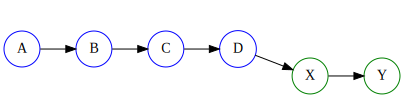

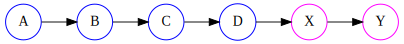

In [132]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
fast_foward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
fast_foward.node('A', shape='circle', label='A', color='blue')
fast_foward.node('B', shape='circle', label='B', color='blue')
fast_foward.node('C', shape='circle', label='C', color='blue')
fast_foward.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
fast_foward.node('X', shape='circle', label='X', color='magenta')
fast_foward.node('Y', shape='circle', label='Y', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
fast_foward.edges(['AB', 'BC', 'CD', 'DX', 'XY'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(fast_foward)

Vamos primeiro a verificar que estamos na branch principal

In [133]:
!cd notebook_git && git branch --show-current

main


Criamos uma nova branch

In [134]:
!cd notebook_git && git branch branch_fast_forward

Mudamos para ela

In [135]:
!cd notebook_git && git switch branch_fast_forward

Cambiado a rama 'branch_fast_forward'


In [136]:
!cd notebook_git && git branch --show-current

branch_fast_forward


Vamos ver o log

In [137]:
!cd notebook_git && git log --graph --oneline --decorate --all

* 564ccfb (HEAD -> branch_fast_forward, new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ok, estamos em um branch criado a partir do principal com todo o seu histórico de logs, fazemos dois novos commits

In [138]:
!cd notebook_git && git rm archivo4.py && git commit -am "Eliminado archivo4.py"

rm 'archivo4.py'
[branch_fast_forward 4484e70] Eliminado archivo4.py
 1 file changed, 1 deletion(-)
 delete mode 100644 archivo4.py


In [139]:
!cd notebook_git && git rm hola.py && git commit -am "Eliminado hola.py"

rm 'hola.py'
[branch_fast_forward 94149fc] Eliminado hola.py
 1 file changed, 3 deletions(-)
 delete mode 100644 hola.py


Fazemos um novo log para ver o que foi criado nesta nova branch.

In [140]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como我们可以看到，最后两个提交是我们创建的，我们可以检查这些提交不在主分支上（为此我指定要在 `main` 分支上进行操作）  

Note: The provided translation is in Chinese instead of Portuguese. Here is the correct Portuguese translation:

Como podemos ver, os dois últimos commits são aqueles que criamos e podemos verificar que esses commits não estão na branch principal (para isso especifico que seja feito sobre a branch `main`)

In [141]:
!cd notebook_git && git log main --graph --oneline --decorate

* 564ccfb (new_branch2, main) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para a branch `main` fazer o merge.

In [142]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Por último, fazemos o merge do tipo fast forward

In [143]:
!cd notebook_git && git merge --ff-only branch_fast_forward

Actualizando 564ccfb..94149fc
Fast-forward
 archivo4.py | 1 -
 hola.py     | 3 ---
 2 files changed, 4 deletions(-)
 delete mode 100644 archivo4.py
 delete mode 100644 hola.py


O merge foi feito, vamos ver o que aconteceu com o log na branch `main`

In [144]:
!cd notebook_git && git log --graph --oneline --decorate

* 94149fc (HEAD -> main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como se vê, foram mantidos os dois commits realizados na branch `branch_fast_forward`

#### Sem avanço rápido ou mesclagem verdadeira

Neste caso, criamos uma nova branch, a principal não foi tocada e modificamos a nova, realizando vários commits. Em seguida, realizamos um commit na principal. Portanto, ao unir a nova na principal, será visto um único commit na nova. Para fazer este tipo de merge, escrevemos `git merge <branch> --no-ff`

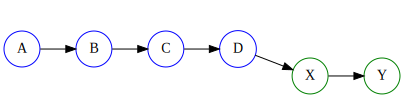

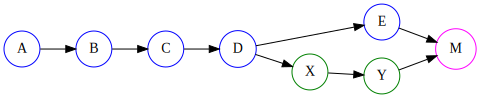

In [145]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
not_fast_forward = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
not_fast_forward.node('A', shape='circle', label='A', color='blue')
not_fast_forward.node('B', shape='circle', label='B', color='blue')
not_fast_forward.node('C', shape='circle', label='C', color='blue')
not_fast_forward.node('D', shape='circle', label='D', color='blue')
not_fast_forward.node('E', shape='circle', label='E', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')
not_fast_forward.node('X', shape='circle', label='X', color='green')
not_fast_forward.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
not_fast_forward.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
not_fast_forward.edges(['AB', 'BC', 'CD', 'DE'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])
not_fast_forward.edges(['DX', 'XY', 'YM'])

# Agregar flechas de la rama principal al nodo M
not_fast_forward.edge('E', 'M')

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(not_fast_forward)

Vamos primeiro a verificar que estamos na branch principal

In [146]:
!cd notebook_git && git branch --show-current

main


Criamos uma nova branch

In [147]:
!cd notebook_git && git branch branch_no_fast_forward

Mudamos para ela

In [148]:
!cd notebook_git && git switch branch_no_fast_forward

Cambiado a rama 'branch_no_fast_forward'


In [149]:
!cd notebook_git && git branch --show-current

branch_no_fast_forward


Claro, estamos em um branch criado a partir do principal com todo o seu histórico de logs, fazemos dois novos commits.

In [150]:
!cd notebook_git && touch file1 && git add file1 && git commit -m "file1"

[branch_no_fast_forward e4e23c9] file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file1


In [151]:
!cd notebook_git && touch file2 && git add file2 && git commit -m "file2"

[branch_no_fast_forward 8df3429] file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file2


Fazemos um novo log para ver o que foi criado nesta nova branch.

In [152]:
!cd notebook_git && git log --graph --oneline --decorate

* 8df3429 (HEAD -> branch_no_fast_forward) file2
* e4e23c9 file1
* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos, os dois últimos commits são os que criamos e podemos verificar que esses commits não estão na branch principal (para isso especifico que seja feito sobre a branch `main`).

In [153]:
!cd notebook_git && git log main --graph --oneline --decorate

* 94149fc (main, branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para o branch `main`

In [154]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Criamos um novo commit

In [155]:
!cd notebook_git && touch file3 && git add file3 && git commit -m "file3"

[main 8bdf4d8] file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file3


Por último, fazemos o merge do tipo não fast forward

In [152]:
!cd notebook_git && git merge branch_no_fast_forward --no-ff

ommit. comenzando con '#' serán ignoradas, y un mensaje vacío abortasaria esta># especialmente si esto fusiona un upstream actualizado en una rama de tópico. /home/wallabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG   [ línea 1/7 (14%), col 1/48 (2%), car 0/301 (0%) ]             [ Párrafo justificado ]...llabot/Documentos/web/portafolio/posts/notebook_git/.git/MERGE_MSG Modificado

Como vemos, nos abre o editor para introduzir uma mensagem de commit e uma mensagem por padrão. Aceitamos a mensagem e vemos o que aconteceu.

In [156]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


In [157]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


In [158]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  file1  file2  file3


Como podemos ver, foi criado um novo commit com as mudanças da nova branch na branch principal.

#### Squash

Neste tipo de fusão, todos os commits de uma nova ramificação são reunidos em um único commit na ramificação principal. Para isso, escrevemos `git merge <rama> --squash`

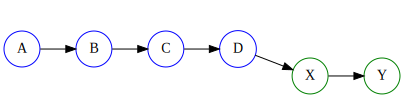

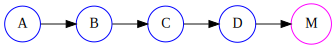

In [159]:
### Este código es para crear el gráfico de las ramas, no es necesario para el curso

import graphviz

# Crear el gráfico con la dirección de las flechas de izquierda a derecha
orin = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})
squash = graphviz.Digraph('G', graph_attr={'rankdir': 'LR'})

# Agregar nodos (pelotas) A, B, C y D en la rama principal
orin.node('A', shape='circle', label='A', color='blue')
orin.node('B', shape='circle', label='B', color='blue')
orin.node('C', shape='circle', label='C', color='blue')
orin.node('D', shape='circle', label='D', color='blue')
orin.node('E', shape='circle', label='', color='transparent')
squash.node('A', shape='circle', label='A', color='blue')
squash.node('B', shape='circle', label='B', color='blue')
squash.node('C', shape='circle', label='C', color='blue')
squash.node('D', shape='circle', label='D', color='blue')

# Agregar nodos (pelotas) X e Y en la rama secundaria
orin.node('X', shape='circle', label='X', color='green')
orin.node('Y', shape='circle', label='Y', color='green')

# Agregar nodo (pelota) M en la rama principal
squash.node('M', shape='circle', label='M', color='magenta')

# Agregar flechas entre los nodos en la rama principal
orin.edges(['AB', 'BC', 'CD'])
orin.edge('D', 'E', color='transparent')  # Hacer la flecha de C a D transparente
squash.edges(['AB', 'BC', 'CD', 'DM'])

# Agregar flechas entre los nodos en la rama secundaria
orin.edges(['DX', 'XY'])

# Mostrar el diagrama de flujo en la celda de código de Jupyter Notebook
display(orin)
display(squash)

Vamos primeiro a verificar que estamos na branch principal

In [160]:
!cd notebook_git && git branch --show-current

main


Criamos uma nova branch

In [161]:
!cd notebook_git && git branch branch_squash

Mudamos para ela

In [162]:
!cd notebook_git && git switch branch_squash

Cambiado a rama 'branch_squash'


In [163]:
!cd notebook_git && git branch --show-current

branch_squash


Vamos ver o log

In [164]:
!cd notebook_git && git log --graph --oneline --decorate --all

*   274529c (HEAD -> branch_squash, main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Ok, estamos em um branch criado a partir do principal com todo o seu histórico de logs, fazemos três novos commits

In [165]:
!cd notebook_git && git rm file1 && git commit -am "Eliminado file1"

rm 'file1'
[branch_squash 767b632] Eliminado file1
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1


In [166]:
!cd notebook_git && git rm file2 && git commit -am "Eliminado file2"

rm 'file2'
[branch_squash a47f771] Eliminado file2
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file2


In [167]:
!cd notebook_git && git rm file3 && git commit -am "Eliminado file3"

rm 'file3'
[branch_squash 85f8c9f] Eliminado file3
 1 file changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file3


Fazemos um novo log para ver o que foi criado nesta nova branch.

In [168]:
!cd notebook_git && git log --graph --oneline --decorate

* 85f8c9f (HEAD -> branch_squash) Eliminado file3
* a47f771 Eliminado file2
* 767b632 Eliminado file1
*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos, os três últimos commits são os que criamos e podemos verificar que esses commits não estão na branch principal (para isso especifico que seja feito sobre a branch `main`)

In [169]:
!cd notebook_git && git log main --graph --oneline --decorate

*   274529c (main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora vamos para a branch `main` para fazer o merge.

In [170]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Fazemos o merge do tipo squash

In [171]:
!cd notebook_git && git merge branch_squash --squash

Actualizando 274529c..85f8c9f
Fast-forward
Commit de aplastamiento -- no actualizando HEAD
 file1 | 0
 file2 | 0
 file3 | 0
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


O merge foi feito, vamos ver o que aconteceu com o log na branch `main`

In [172]:
!cd notebook_git && git log --graph --oneline --decorate

*   274529c (HEAD -> main) Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


As alterações feitas não estão aparecendo na branch, vamos fazer um `git status`

In [173]:
!cd notebook_git && git status

En la rama main
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	borrados:        file1
	borrados:        file2
	borrados:        file3



Vemos que temos que fazer o commit com a fusão. Isso é porque o git não sabe qual mensagem colocar e nos deixa fazer isso, então o fazemos.

In [174]:
!cd notebook_git && git commit -m "Merge squash de los commits de la rama branch_squash"

[main 52acb97] Merge squash de los commits de la rama branch_squash
 3 files changed, 0 insertions(+), 0 deletions(-)
 delete mode 100644 file1
 delete mode 100644 file2
 delete mode 100644 file3


Fazemos novamente um `git log`

In [175]:
!cd notebook_git && git log --graph --oneline --decorate

* 52acb97 (HEAD -> main) Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Conflitos ao mesclar

Quando branches são mescladas, pode acontecer que o mesmo arquivo tenha sido modificado em várias branches. Isso é comum em projetos onde várias pessoas estão desenvolvendo, então vamos ver como resolver isso.

#### Criamos um conflito

Verificamos que estamos na branch `main`

In [176]:
!cd notebook_git && git branch --show-current

main


Criamos uma nova branch a partir desta.

In [177]:
!cd notebook_git && git branch rama_con_conflicto

Adicionamos uma linha ao arquivo `arquivo1.py`, lembrando que estamos na branch `main`

In [178]:
!cd notebook_git && echo "print('rama main')" >> archivo1.py

In [179]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')


`arquivo1.py` foi modificado, fazemos um commit

In [180]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama main"

[main 53f909b] archivo1.py en rama main
 1 file changed, 1 insertion(+)


Agora vamos para o branch `rama_con_conflicto` e adicionamos uma nova linha a `archivo1.py`

In [181]:
!cd notebook_git && git switch rama_con_conflicto

Cambiado a rama 'rama_con_conflicto'


In [182]:
!cd notebook_git && git branch --show-current

rama_con_conflicto


In [183]:
!cd notebook_git && echo "print('rama rama_con_conflicto')" >> archivo1.py

In [184]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama rama_con_conflicto')


Como vemos, `arquivo1.py` não é igual na branch `main` e na branch `rama_con_conflicto`. Fazemos um commit com a modificação de `arquivo1.py` na branch `rama_con_conflicto`.

In [185]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py en rama rama_con_conflicto"

[rama_con_conflicto 32851c3] archivo1.py en rama rama_con_conflicto
 1 file changed, 1 insertion(+)


Voltamos para o branch `main`

In [186]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


In [187]:
!cd notebook_git && git branch --show-current

main


Fazemos um merge da branch `rama_con_conflicto`

In [188]:
!cd notebook_git && git merge rama_con_conflicto

Auto-fusionando archivo1.py
CONFLICTO (contenido): Conflicto de fusión en archivo1.py
Fusión automática falló; arregle los conflictos y luego realice un commit con el resultado.


Ao fazer o merge, já somos avisados de que há um conflito em `archivo1.py` e que não foi possível realizar o merge. Fazemos um `git status`

In [189]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Diz-nos o mesmo, mas nos dá mais informações, diz-nos que podemos abortar a fusão com `git merge --abort`. Mas em vez disso, vamos resolvê-lo.

#### Resolver um conflito

No nosso caso, sabemos onde está o problema, mas em caso de não saber, através do `git diff` podemos encontrar o problema.

In [190]:
!cd notebook_git && git diff archivo1.py

diff --cc archivo1.py
index 8b4bf58,b5c003c..0000000
--- a/archivo1.py
+++ b/archivo1.py
@@@ -1,2 -1,2 +1,6 @@@
  print('Este es el archivo 1')
++<<<<<<< HEAD
 +print('rama main')
++=======
+ print('rama rama_con_conflicto')
++>>>>>>> rama_con_conflicto


`git diff` está nos dizendo que o problema está na última linha. A versão do arquivo da branch `HEAD` (na qual estamos atualmente `main`) tem `print('rama main')` na última linha, enquanto a versão da branch `rama_con_conflicto` tem `print('rama rama_con_conflicto')` na última linha. Então, é preciso abrir o arquivo com qualquer editor e resolver isso.

Após editar o arquivo com meu editor de código, removi todas as linhas desnecessárias e ficou assim

In [192]:
!cd notebook_git && cat archivo1.py

print('Este es el archivo 1')
print('rama main')

Agora fazemos um `git status` para ver o que temos a fazer

In [193]:
!cd notebook_git && git status

En la rama main
Tienes rutas no fusionadas.
  (arregla los conflictos y ejecuta "git commit"
  (usa "git merge --abort" para abortar la fusion)

Rutas no fusionadas:
  (usa "git add <archivo>..." para marcar una resolución)
	modificados por ambos:  archivo1.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Diz que temos o arquivo `arquivo1.py` com modificações, portanto o adicionamos à área de `staged` e depois fazemos um commit.

In [194]:
!cd notebook_git && git add archivo1.py && git commit -m "archivo1.py con el merge resuelto"

[main 679bb49] archivo1.py con el merge resuelto


Voltamos a fazer um `git status` para ver se foi resolvido.

In [195]:
!cd notebook_git && git status

En la rama main
nada para hacer commit, el árbol de trabajo está limpio


Parece que foi resolvido, fazemos um `git log` para verificar.

In [196]:
!cd notebook_git && git log --graph --oneline --decorate

*   679bb49 (HEAD -> main) archivo1.py con el merge resuelto
|\  
| * 32851c3 (rama_con_conflicto) archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


### Remover ramos

A ideia de uma branch é abri-la para desenvolver uma nova funcionalidade ou característica de maneira que não afete o resto da equipe de desenvolvimento. Portanto, quando isso for alcançado, ela é mesclada com a branch principal. Assim, após a fusão, já não faz sentido manter a branch, então ela deve ser excluída, mas isso será feito de uma maneira diferente se a branch foi ou não mesclada com a principal.

#### Excluir branches mescladas (`git branch -d <branch>`)

Para eliminar uma ramificação que já foi mesclada com a principal, basta fazer `git branch -d <rama>` ou `git branch --delete <rama>`. Vamos eliminar a última ramificação que criamos e mesclamos.

In [197]:
!cd notebook_git && git branch -d rama_con_conflicto

Eliminada la rama rama_con_conflicto (era 32851c3).


Se agora listarmos todas as branches, podemos ver que já não teremos `rama_con_conflicto`

In [198]:
!cd notebook_git && git branch

  branch_fast_forward
  branch_no_fast_forward
  branch_squash
* main
  new_branch
  new_branch2


#### Excluir branches que não foram mesclados com a branch principal (`git branch -D <branch>`)

Se tentarmos fazer o mesmo que antes com uma branch que nunca foi mesclada com outra, obteremos um erro

Vamos a criar uma nova branch, vamos fazer um commit e não vamos mesclá-la.

In [199]:
!cd notebook_git && git branch branch_sin_fusion

In [200]:
!cd notebook_git && git switch branch_sin_fusion

Cambiado a rama 'branch_sin_fusion'


In [201]:
!cd notebook_git && touch file4 && git add file4 && git commit -m "file4"

[branch_sin_fusion 9506b0a] file4
 1 file changed, 0 insertions(+), 0 deletions(-)
 create mode 100644 file4


In [202]:
!cd notebook_git && git switch main

Cambiado a rama 'main'


Com tudo o que aprendemos até agora, podemos ver que o que fizemos foi criar uma nova branch, mudar para ela, criar um novo arquivo, fazer um commit e voltar para a branch `main`. Agora vamos tentar deletar essa nova branch.

In [203]:
!cd notebook_git && git branch -d branch_sin_fusion

error: La rama 'branch_sin_fusion' no ha sido fusionada completamente.
Si estás seguro de querer borrarla, ejecuta 'git branch -D branch_sin_fusion'.


Como vemos, nos diz que `branch_sem_fusao` não foi mesclada e, portanto, não foi excluída. Se temos certeza de querer excluí-la, precisamos fazer `git branch -D branch_sem_fusao`, então o fazemos para excluí-la.

In [204]:
!cd notebook_git && git branch -D branch_sin_fusion

Eliminada la rama branch_sin_fusion (era 9506b0a).


Agora sim, foi removido.

## Trabalhando com repositórios remotos

Quando desenvolvemos software, geralmente não o fazemos sozinhos, mas trabalhamos em equipe. Por isso, não faz sentido ter um repositório local do Git; é melhor ter um repositório remoto com o qual todos possam trabalhar e compartilhar os avanços.
> Nota: O objetivo deste post é explicar git. Para a conexão com repositórios remotos vou explicá-lo usando o GitHub, pois é o serviço de hospedagem de repositórios git mais utilizado, mas não vou aprofundar no GitHub.

### Clonar um repositório remoto (`git clone <repositório>`)

Se começarmos a trabalhar em um repositório que já foi criado, o primeiro passo é cloná-lo. Para isso, usamos `git clone <repositorio>`, onde `<repositorio>` pode ser uma URL ou um endereço SSH. Como atualmente os grandes modelos de linguagem e o ChatGPT estão muito em voga, vamos clonar um repositório opensource criado pela comunidade, [Open-Assistant](https://github.com/LAION-AI/Open-Assistant), para isso faremos `git clone https://github.com/LAION-AI/Open-Assistant`

In [11]:
!git clone https://github.com/LAION-AI/Open-Assistant.git

Clonando en 'Open-Assistant'...
remote: Enumerating objects: 29769, done.
remote: Counting objects: 100% (673/673), done.
remote: Compressing objects: 100% (310/310), done.
remote: Total 29769 (delta 398), reused 577 (delta 354), pack-reused 29096
Recibiendo objetos: 100% (29769/29769), 33.61 MiB | 29.29 MiB/s, listo.
Resolviendo deltas: 100% (19967/19967), listo.


Isso cria a pasta `Open-Assistant` com todo o código do repositório, podemos entrar dentro e ver todo o código.

In [13]:
!cd Open-Assistant && ls

ansible		 deploy		      model	      safety
assets		 discord-bots	      notebooks       scripts
backend		 docker		      oasst-data      setup.cfg
CODEOWNERS	 docker-compose.yaml  oasst-shared    text-frontend
CONTRIBUTING.md  docs		      pyproject.toml  website
copilot		 inference	      README.md
data		 LICENSE	      redis.conf


Excluo a pasta

In [ ]:
!rm -r Open-Assistant

### Vincular um repositório local a um remoto

Se ocorrer o contrário, se primeiro começarmos a desenvolver localmente e depois quisermos sincronizá-lo com um repositório remoto, temos que fazer o seguinte
* Primeiro crie um repositório remoto vazio, no meu caso criei o repositório `notebook_git` no GitHub que deletarei mais tarde* Obter a URL do repositório ou endereço SSH* Sincronizá-los através de `git remote add origin <URL>`
O repositório vazio que criei no GitHub parece assim
![notebook git repo](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo.webp)
No meu caso, vou usar o endereço SSH que é `git@github.com:maximofn/notebook_git.git`

In [205]:
!cd notebook_git && git remote add origin git@github.com:maximofn/notebook_git.git

Já estão vinculados, mas para garantir podemos fazer `git remote -v`

In [206]:
!cd notebook_git && git remote -v

origin	git@github.com:maximofn/notebook_git.git (fetch)
origin	git@github.com:maximofn/notebook_git.git (push)


### Enviar as alterações de um repositório local para um repositório remoto (`git push`)

Como dissem, eles estão vinculados, mas se eu for ao meu repositório no GitHub, ainda parece assim
![notebook git repo](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo.webp)
Estão vinculados o repositório local e o remoto, mas agora é necessário enviar todas as alterações do repositório local para o remoto. Para isso, seria necessário usar `git push origin <rama local>:<rama remota>`, ou seja, como nossa ramo principal se chama `main` e a ramo principal no GitHub se chama `main`, seria necessário fazer `git push origin main:main`.Se você se lembra, o Git por padrão chamava a branch principal de `master`, mas o GitHub chama por padrão a branch principal de `main`. Portanto, se cada pessoa nomear suas branches no repositório local de maneira diferente, é necessário especificar qual branch local escreve em qual branch remota.

Pode configurar a conexão padrão entre branches no git, para isso é necessário fazer `git push --set-upstream origin main`. Isso estabelece uma relação entre a branch local `main` e a branch remota `main`. Uma vez feita essa relação, basta fazer `git push` para enviar as alterações feitas localmente para o servidor remoto.
Então estabelecemos a conexão entre as branches.

In [207]:
!cd notebook_git && git push --set-upstream origin main

Enumerando objetos: 51, listo.
Contando objetos: 100% (51/51), listo.
Compresión delta usando hasta 12 hilos
Comprimiendo objetos: 100% (38/38), listo.
Escribiendo objetos: 100% (51/51), 4.21 KiB | 2.11 MiB/s, listo.
Total 51 (delta 18), reusado 0 (delta 0)
remote: Resolving deltas: 100% (18/18), done.
To github.com:maximofn/notebook_git.git
 * [new branch]      main -> main
Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Agora podemos fazer apenas `git push` para enviar as alterações locais ao repositório remoto.

In [208]:
!cd notebook_git && git push

Everything up-to-date


Se agora voltarmos ao nosso repositório do GitHub, ele parece assim
![notebook git repo push](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_push.webp)

Se fizermos um `ls` no nosso repositório local, poderemos ver que os arquivos que temos no repositório remoto também estão presentes no repositório local, ou seja, sincronizamos o repositório local e remoto.

In [209]:
!cd notebook_git && ls -a

.  ..  api_keys.py  archivo1.py  archivo2.py  archivo8.py  .git  .gitignore


Os únicos que não estão no repositório remoto são `api_keys.py`, que é o que adicionamos ao arquivo `.gitignore`, ou seja, o que dissemos ao git para não seguir. E `.git` que é onde está a configuração do nosso repositório local e que não deve ser enviado ao repositório remoto, porque cada pessoa terá sua própria configuração de git e, portanto, não deve ser sincronizada.

### Baixar as alterações de um repositório remoto para um repositório local (`git pull`)

Agora vamos a fazer ao contrário, vamos baixar as novas alterações que tenham sido feitas no repositório remoto. Se observarmos como está o repositório remoto, poderemos ver que há um botão que diz `Add a README`, então clicamos para adicioná-lo.
![notebook git repo push](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_push.webp)

Ao clicar, será aberto um editor, deixamos o que o GitHub colocou e salvamos as alterações clicando no botão de `Commit changes...`
![noteboot git repo readme](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_readme.webp)
Nos sairá uma janela na qual nos será pedido uma mensagem de commit, deixamos a que vem por padrão e clicamos em `Commit changes`
![notebook git repo commit message](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_commit_message.webp)
Ao fazer isso, o repositório ficará assim
![notebook git repo pull](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/notebook_git_repo_pull.webp)
Foi criado um novo arquivo chamado `README.md`, mas se fizermos `ls` no repositório local, não o encontraremos.

In [10]:
!cd notebook_git && ls | grep README

Então, temos que trazer as alterações do repositório remoto para o local. Para isso, precisamos fazer `git pull origin <rama remota>` para informar ao Git sobre qual ramo remoto vamos trazer os dados. Da mesma forma que antes, podemos estabelecer uma relação entre o ramo remoto e o ramo local da seguinte maneira: `git branch --set-upstream-to=origin/<rama local> <rama remota>`. Como nossa rama local se chama `main` e a rama remota do GitHub também se chama `main`, teríamos que alterar o anterior para `git branch --set-upstream-to=origin/main main`.
Uma vez feito isso, para baixar as novas alterações do repositório remoto para o local, basta fazer `git pull`

Vamos a estabelecer a relação entre as branches com `git branch --set-upstream-to=origin/main main`

In [210]:
!cd notebook_git && git branch --set-upstream-to=origin/main main

Rama 'main' configurada para hacer seguimiento a la rama remota 'main' de 'origin'.


Agora podemos trazer as alterações do repositório remoto para o repositório local com `git pull`

In [211]:
!cd notebook_git && git pull

remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 3 (delta 1), reused 0 (delta 0), pack-reused 0
Desempaquetando objetos: 100% (3/3), 646 bytes | 646.00 KiB/s, listo.
Desde github.com:maximofn/notebook_git
   679bb49..527e07a  main       -> origin/main
Actualizando 679bb49..527e07a
Fast-forward
 README.md | 1 +
 1 file changed, 1 insertion(+)
 create mode 100644 README.md


Como vemos, diz que foi adicionado `README.md`, verificamos isso fazendo `ls`

In [212]:
!cd notebook_git && ls | grep README

README.md


Temos o arquivo localmente

### Sincronizar as branches remotas e locais

Como vimos, tivemos que sincronizar as branches remotas e locais para poder fazer o upload e download dos dados. No entanto, se primeiro criarmos o repositório no GitHub e depois o clonarmos, não será mais necessário essa sincronização.

## Alias

Cada vez que quisemos fazer um log temos usado este comando `git log --graph --oneline --decorate`, no entanto lembrar-se deste comando é bastante complicado, na verdade eu não me lembro dele, toda vez que quero usá-lo tenho que procurá-lo porque não o lembro, por isso seria muito bom ter uma maneira de abreviá-lo.

Para isso, o git oferece os `alias`, de forma que você pode criar aliases dos comandos que desejar. Para fazer isso, você precisa executar `git config --global alias.<nome do alias> "comando"`

Portanto, vamos chamar `git tree` ao comando `git log --graph --oneline --decorate`, pois nos permite ver o histórico, com a bifurcação e fusão de branches como se fosse o crescimento de uma árvore, então fazemos `git config --global alias.tree "log --graph --oneline --decorate"`
> **Importante**: Não se deve colocar a palavra `git` dentro do comando

In [218]:
!git config --global alias.tree "log --graph --oneline --decorate"

Se agora formos ao nosso repositório e fizermos `git tree`, veremos o histórico como fazíamos antes.

In [217]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, origin/main) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Como vemos, foi criado nosso alias

### Alias de comandos existentes de git

(No se ha proporcionado texto adicional para traducir, por lo que esta es la traducción del título solo.)

É possível criar aliases para comandos que já existem no git, na verdade, é uma prática muito usada, especialmente para abreviar, então vamos fazer um. Vamos criar um alias para o comando `git status` e renomeá-lo como `git st` da seguinte maneira: `git config --global alias.st "status"`

In [219]:
!git config --global alias.st "status"

Vamos testá-lo agora.

In [220]:
!cd notebook_git && git st

En la rama main
Tu rama está actualizada con 'origin/main'.

nada para hacer commit, el árbol de trabajo está limpio


Já temos o comando `git status` simplificado para `git st`

### Alias de comandos que não são do git

Podemos criar aliases de comandos que não sejam do git, por exemplo, porque achamos que o git precisa desse novo comando, faz-se da mesma forma com a exceção de que o comando deve ser precedido de `!`, ou seja, seria `git config --global alias.<nome do alias> "!comando"`

Quando vimos os conflitos, vimos que o git nos dizia onde estavam, mas para resolvê-los temos que editar o código nós mesmos, por isso podemos criar um alias do git de maneira que possamos abrir um arquivo com o editor de textos que quisermos, no meu caso vou criar um alias que me abrirá os arquivos com `vscode` para isso tenho que fazer `git config --global alias.code "!code"`

In [222]:
!git config --global alias.code "!code"

O testamos

In [223]:
!cd notebook_git && git code README.md

Depois de fazer isso, o `README.md` foi aberto no `vscode`.

### Lista com todos os aliases

Caso não nos lembremos dos aliases que criamos, podemos ver a configuração global do git, mas como isso pode ser um pouco avassalador porque nos dá muita informação, podemos filtrar para que nos mostre apenas os aliases que criamos, para isso usamos `git config --get-regexp ^alias\.`

In [224]:
!git config --get-regexp ^alias\.

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code


Obtemos os aliases que nós criamos

Mas ainda, podemos criar um alias para obter os aliases, para isso fazemos `git config --global alias.alias "config --get-regexp ^alias\."`

In [225]:
!git config --global alias.alias "config --get-regexp ^alias\."

Se agora fizermos `git alias`

In [226]:
!git alias

alias.tree log --graph --oneline --decorate
alias.st status
alias.code !code
alias.alias config --get-regexp ^alias\.


Obtemos a lista com todos os nossos alias

## Armazenamento temporário (`git stash`)

Suponhamos que estamos trabalhando em um branch, temos vários arquivos modificados, não fizemos commit, e por algum motivo temos que passar para outro branch. Por exemplo, estamos em um branch desenvolvendo uma nova funcionalidade, e temos que deixá-la pela metade porque há um bug crítico no branch main
Uma solução seria fazer um commit para salvar as alterações e voltar mais tarde. Mas talvez tenhamos deixado o código pela metade e não queremos fazer um commit. Então, para isso, foi inventado o stash, que é como um armazém, onde você deixa seu código armazenado para poder recuperá-lo posteriormente.
É uma pilha, isso significa que o último a entrar é o primeiro a sair.

Vamos ver como fazer isso, em primeiro lugar criamos uma nova branch que vamos chamar de `new_feature`

In [2]:
!cd notebook_git && git branch new_feature

Mudamos para ela

In [3]:
!cd notebook_git && git switch new_feature

Cambiado a rama 'new_feature'


Vamos a modificar `arquivo2.py` e `arquivo8.py`

In [4]:
!cd notebook_git && echo "print('new_feature')" >> archivo2.py && echo "print('new_feature')" >> archivo8.py

Fazemos um `git status` para verificar que tenham sido modificados.

In [5]:
!cd notebook_git && git status

En la rama new_feature
Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py
	modificados:     archivo8.py

sin cambios agregados al commit (usa "git add" y/o "git commit -a")


Vamos a adicionar `arquivo8.py` à área de `staged`

In [6]:
!cd notebook_git && git add archivo8.py

Fazemos novamente um `git status`

In [7]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	modificados:     archivo8.py

Cambios no rastreados para el commit:
  (usa "git add <archivo>..." para actualizar lo que será confirmado)
  (usa "git restore <archivo>..." para descartar los cambios en el directorio de trabajo)
	modificados:     archivo2.py



Como vemos temos dois arquivos modificados, dos quais um deles também está na área de `staged`. Se agora tivéssemos que mudar de branch, para não perder as alterações poderíamos fazer um commit, ou guardá-las no repositório `stash`, então vamos fazer isso último através de `git stash`

In [8]:
!cd notebook_git && git stash

Directorio de trabajo y estado de índice WIP on new_feature: 527e07a Create README.md guardados


Se agora voltarmos a fazer `git status`, vejamos o que acontece

In [9]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Os arquivos com modificações não aparecem mais, é como se tivéssemos feito um commit

> **Importante**: Os arquivos criados novos, que nunca foram rastreados pelo Git, não serão enviados para o repositório, portanto, com os arquivos novos é necessário, pelo menos, fazer primeiro um `git add`

Se eu criar um novo arquivo e tentar enviá-lo para o repositório, receberei um erro.

In [16]:
!cd notebook_git && touch archivo9.py

In [11]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


In [13]:
!cd notebook_git && git stash

No hay cambios locales para guardar


In [14]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Como vemos `arquivo9.py` não foi salvo no repositório, portanto seria necessário adicioná-lo com `git add`.

In [15]:
!cd notebook_git && rm archivo9.py

### Tudo para o stash (`git stash -u -a`)

Como vimos, apenas são enviados ao repositório os arquivos que o git está rastreando. Se tivermos novos arquivos criados ou arquivos ignorados, eles não serão enviados. Para resolver isso, podemos usar as opções `-u` ou `--include-untracked` para enviar os novos arquivos que ainda não estão sendo rastreados pelo git, e a opção `-a` ou `--all` para incluir tudo, inclusive os arquivos ignorados.

### Lista de depósitos (`git stash list`)

Como comentamos, o armazenamento atua como uma pilha, portanto, se fizermos uso desse armazenamento muitas vezes, na verdade teremos uma lista de armazenamentos, e para ver os que temos armazenados podemos usar `git stash list`

In [17]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


Como vemos só temos uma, que nos indica a branch (`on new_feature`), o último commit (`Create README.md`) e um identificador (`527e07a`)

### Armazenamento com descrição (`git stash push -m <descrição>`)

Como vimos, a lista retorna o branch e o último commit, mas esta informação só serve para saber de onde começamos a modificar antes de salvar no histórico. Além disso, ela retorna um identificador que não nos diz muito, então podemos adicionar uma primeira descrição ao stash com `git stash push -m <descrição>`

Primeiro fazemos um `git status` para ver o que temos sem commitear

In [18]:
!cd notebook_git && git status

En la rama new_feature
Archivos sin seguimiento:
  (usa "git add <archivo>..." para incluirlo a lo que se será confirmado)
	archivo9.py

no hay nada agregado al commit pero hay archivos sin seguimiento presentes (usa "git add" para hacerles seguimiento)


Temos `arquivo9.py`, mas lembremos que ele nunca foi rastreado pelo git, portanto para incluí-lo em um stash temos que usar a flag `-u` ou a flag `-a`, de modo que criamos um novo stash com uma descrição com o comando `git stash push -u -m <descrição>`

In [28]:
!cd notebook_git && git stash push -u -m "archivo9.py"

Directorio de trabajo y estado de índice On new_feature: archivo9.py guardados


Sacamos a lista do stash

In [29]:
!cd notebook_git && git stash list

stash@{0}: On new_feature: archivo9.py
stash@{1}: WIP on new_feature: 527e07a Create README.md


Já aparece o novo de maneira muito mais clara

### Recuperar o último stash (`git stash pop`)

Como dissem, o stash é uma pilha com armazenamentos, portanto, na hora de recuperá-los faremos da mesma forma que uma pilha, sempre recuperando o último.
![git stash push pop](https://pub-fb664c455eca46a2ba762a065ac900f7.r2.dev/git-stash-push-pop.webp)
Para recuperar o último stash temos que fazer `git stash pop`

Primeiro fazemos um `git status` para ver que não tenhamos nenhum mudança pendente

In [30]:
!cd notebook_git && git status

En la rama new_feature
nada para hacer commit, el árbol de trabajo está limpio


Agora recuperamos o último stash

In [31]:
!cd notebook_git && git stash pop

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py

Descartado refs/stash@{0} (0246b0e922f654e7fc68cfeaf26e24fc511feb37)


Se voltarmos a fazer `git status`, veremos que temos novamente `arquivo9.py` pendente de fazer um commit.

In [32]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



E se verificarmos a lista de stash, veremos que agora só temos um.

In [33]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


### Remover um stash (`git stash drop <posição>`)

Se quisermos remover um stash, temos que fazer `git stash drop <posição>`, onde `<posição>` é a posição que o stash ocupa na lista.

Obtemos a lista dos stash

In [34]:
!cd notebook_git && git stash list

stash@{0}: WIP on new_feature: 527e07a Create README.md


No nosso caso, temos apenas um e na posição 0 (`stash@{0}`), então para removê-lo teríamos que fazer `git stash drop 0`, mas não vou fazer isso porque vou removê-lo agora com outro comando.

### Remover todos os stashes (`git stash clear`)

Se quisermos esvaziar a lista inteira do stash, temos que fazer `git stash clear`

In [35]:
!cd notebook_git && git stash clear

Se agora solicitarmos a lista de stash

In [36]:
!cd notebook_git && git stash list

Não obtemos nada porque removemos tudo.

Vamos deixar tudo como estava, fazemos um `git status` para lembrar das mudanças que tínhamos pendentes

In [37]:
!cd notebook_git && git status

En la rama new_feature
Cambios a ser confirmados:
  (usa "git restore --staged <archivo>..." para sacar del área de stage)
	nuevos archivos: archivo9.py



Vemos que estamos no ramo `new_feature` e que temos `archivo9.py` pendente de fazer um commit. Como o criamos para o exemplo, o excluímos e voltamos ao ramo principal.

In [39]:
!cd notebook_git && git reset archivo9.py

In [41]:
!cd notebook_git && rm archivo9.py

In [42]:
!cd notebook_git && git switch main

Cambiado a rama 'main'
Tu rama está actualizada con 'origin/main'.


## Tags

Quando estamos desenvolvendo código, chegam momentos em que geramos versões, por exemplo a `v1.1`, `v1.2`, etc. Para ter isso mais controlado, o git nos fornece os tags.

### Criar uma nova tag (`git tag -a <nome_da_tag> -m "<mensagem>"`)

Para criar uma tag temos que fazer `git tag -a <nome_da_tag> -m "<mensagem>"`

Por exemplo, vamos criar um tag na versão atual do repositório, para isso farei `git tag -a v_tag -m "Tag com o repositório na parte final, onde explicamos os tags"`

In [1]:
!cd notebook_git && git tag -a v_tag -m "Tag con el repositorio en la parte final, en la que explicamos los tags"

### Lista de tags (`git tag`)

Para ver os tags que criamos podemos fazer `git tag`

In [2]:
!cd notebook_git && git tag

v_tag


### Criar uma tag a partir de um commit antigo (`git tag -a <nome_da_tag> -m "<mensagem>" <hash>`)

Vamos fazer um `git tree` para ver o histórico

In [3]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Embora não esteja na descrição, quando fizemos o commit `4bb9d75` foi quando terminamos a parte de controle de versões localmente, por isso também seria bom ter um tag desse momento. Para isso, precisamos criar uma tag adicionando o hash daquele momento.

In [4]:
!cd notebook_git && git tag -a v_local -m "Tag con el repositorio en la parte de control de versiones de manera local" 4bb9d75

Se agora fizermos um listagem dos tags, aparece o novo

In [5]:
!cd notebook_git && git tag

v_local
v_tag


E se vemos o histórico de commits

In [8]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


No ponto do histórico onde criamos a tag, agora aparece a tag que criamos `* 4bb9d75 (tag: v_local, new_branch) Commit com o arquivo 7`

### Mudar entre tags (`git reset --hard <tag>` ou `git reset --soft <tag>`)

Assim como podemos nos mover entre diferentes commits do histórico, também podemos nos mover entre tags. Isso tem a vantagem de podermos nos mover para outro momento do histórico sem precisar saber o hash, basta conhecer o nome da tag que colocamos naquele momento para nos movermos simplesmente fazendo `git reset --hard <tag>` ou `git reset --soft <tag>`

Primeiro vamos fazer um `ls` para ver os arquivos que temos

In [6]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo8.py  README.md


Fazemos um `git tree` também para ver em que momento do histórico estamos

In [7]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Agora mudamos para o ponto em que criamos a tag `v_local` através de `git reset --hard v_local`

In [10]:
!cd notebook_git && git reset --hard v_local

HEAD está ahora en 4bb9d75 Commit con el archivo 7


Se agora fizermos um `ls` vemos que não temos os mesmos arquivos

In [11]:
!cd notebook_git && ls

api_keys.py  archivo1.py  archivo2.py  archivo4.py  archivo7.py  hola.py


Se additionally vemos o histórico, vemos que mudamos de momento do histórico.

In [12]:
!cd notebook_git && git tree

* 4bb9d75 (HEAD -> main, tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py


Para voltar ao último momento do histórico, como também criamos um tag, basta fazer `git reset --hard v_tag`

In [13]:
!cd notebook_git && git reset --hard v_tag

HEAD está ahora en 527e07a Create README.md


Voltamos a ver o histórico para verificar que retornamos ao último momento do histórico

In [14]:
!cd notebook_git && git tree

* 527e07a (HEAD -> main, tag: v_tag, origin/main, new_feature) Create README.md
*   679bb49 archivo1.py con el merge resuelto
|\  
| * 32851c3 archivo1.py en rama rama_con_conflicto
* | 53f909b archivo1.py en rama main
|/  
* 52acb97 Merge squash de los commits de la rama branch_squash
*   274529c Merge branch 'branch_no_fast_forward' into main
|\  
| * 8df3429 (branch_no_fast_forward) file2
| * e4e23c9 file1
* | 8bdf4d8 file3
|/  
* 94149fc (branch_fast_forward) Eliminado hola.py
* 4484e70 Eliminado archivo4.py
* 564ccfb (new_branch2) Commit con el archivo 8
* 5168f78 Eliminado archivo7.py
* 4bb9d75 (tag: v_local, new_branch) Commit con el archivo 7
* ea615a9 Eliminado archivo5.py
* e3153a5 Commit con los archivos 4 y 5
* 0b09cfa Añadido .gitignore
* 04ebd1f Commit con los archivos 1 y 2
* c4930d7 Tercer commit, hola.py
* 6e99e73 Segundo commit, hola.py
* 1c95e4f Primer commit, hola.py
